# Predicting Video Game Sales
First of all, we need to import some libraries.

In [132]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
#import visuals as vs
import matplotlib.pyplot as plt

# Allows the use of display() for DataFrames
from IPython.display import display

# make pretty
plt.style.use('ggplot')

# Pretty display for notebooks
%matplotlib inline

# Data Schema

## Dataset 1 (Video_Games_Sales_as_at_22_Dec_2016.csv)
This is my main dataset. It will be used to predict video game sales.

| title           | description                                                   | data type |
|-----------------|---------------------------------------------------------------|-----------|
| Name            | Name of the game                                              | String    |
| Platform        | Platform                                                      | String    |
| Year_of_Release | Year of release                                               | Numeric   |
| Genre           | Genre                                                         | String    |
| Publisher       | Publisher                                                     | String    |
| NA_Sales        | Game sales in North America (in millions of units)            | Numeric   |
| EU_Sales        | Game sales in the European Union (in millions of units)       | Numeric   |
| JP_Sales        | Game sales in Japan (in millions of units)                    | Numeric   |
| Other_Sales     | Game sales in the rest of the world (in millions of units)    | Numeric   |
| Global_Sales    | Total sales in the world (in millions of units)               | Numeric   |
| Critic_Score    | Aggregate score compiled by Metacritic staff                  | Numeric   |
| Critic_Count    | The number of critics used in coming up with the Critic_score | Numeric   |
| User_Score      | Score by Metacritic's subscribers                             | Numeric   |
| User_Count      | Number of users who gave the user_score                       | Numeric   |
| Developer       | Party responsible for creating the game                       | String    |
| Rating          | The [ESRB](https://www.esrb.org/) ratings                     | String    |

## Dataset 2 (ign.csv)
This is my secondary dataset. It might be used to support the primary dataset, but this would probably require major effort for merging both.

| title           | description                                                   | data type |
|-----------------|---------------------------------------------------------------|-----------|
| ID              | ID                                                            | Numeric   |
| score_phrase    | Game rating as a phrase                                       | String    |
| title           | Name of the game                                              | String    |
| url             | URL to source of data                                         | String    |
| platform        | Platform                                                      | String    |
| score           | Game rating as a float                                        | Numeric   |
| genre           | Genre                                                         | String    |
| editors_choice  | Special recommendation of the editor                          | String    |
| release_year    | Year of release                                               | Numeric   |
| release_month   | Month of release                                              | Numeric   |
| release_day     | Day of release                                                | Numeric   |


We can remove several colums in dataset2 that we don't need:
* **ID** which is just an ID that's not used in dataset 1
* **score_phrase**, because it redundant to _score_ and less precise
* **url**, because that's just the origin of the data
The next step will be to load the datasets.

In [133]:
# Load dataset #1
try:
    dataset1 = pd.read_csv("data/Video_Games_Sales_as_at_22_Dec_2016.csv")
    print "Dataset #1 has {} samples with {} features each.".format(*dataset1.shape)
except:
    print "Dataset #1 could not be loaded. Is the dataset missing?"

print('\n')

Dataset #1 has 16719 samples with 16 features each.




In [134]:
# Display a description of the datasets
display(dataset1.dtypes)
display(dataset1.head())
display(dataset1.tail())
display(dataset1.describe())
print('\n')

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16718,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


* Clean up all strings
* Remove rows without critic_score and user_score

In [135]:
# beautify strings
for i in range(0, len(dataset1.axes[1])):
    if (dataset1.ix[:,i].dtype == object):
        dataset1.ix[:,i] = dataset1.ix[:,i].str.strip()

## tbd to NaN
df1 = dataset1.replace('tbd', float('NaN'))

## remove rows without full relevant information
df1 = df1[df1.Platform.notnull()]
df1 = df1[df1.Genre.notnull()]
df1 = df1[df1.Publisher.notnull()]

## TODO: Hint why only global sales relevant => linear dependency and only 1688 rows otherwise
# df1 = df1[df1.NA_Sales > 0]
# df1 = df1[df1.EU_Sales > 0]
# df1 = df1[df1.JP_Sales > 0]
# df1 = df1[df1.Other_Sales > 0]

df1 = df1[df1.Global_Sales > 0]
df1 = df1[df1.Year_of_Release.notnull()]
#metacritic founded in 1999
df1 = df1[df1.Year_of_Release >= 1999]
df1 = df1[df1.Critic_Score.notnull()]
df1 = df1[df1.User_Score.notnull()]
df1 = df1[df1.Critic_Count > 0]
df1 = df1[df1.User_Count > 0]
df1 = df1[df1.Developer.notnull()]
df1 = df1[df1.Rating.notnull()]

## correct data type of User_Score
df1[['User_Score']] = df1[['User_Score']].apply(pd.to_numeric)

## Scale User_Score to boundaries of Critic_Score
df1[['User_Score']] = df1[['User_Score']] * 10

## Get new description
display(df1.describe())
display(df1.head())

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,6776.000000,6776.000000,6776.000000,6776.000000,6776.000000,6776.000000,6776.000000,6776.000000,6776.000000,6776.000000
mean,2007.513872,0.391169,0.233666,0.061020,0.082463,0.768506,70.181818,29.039109,71.779073,172.786157
std,4.122169,0.964950,0.685281,0.279568,0.270346,1.954930,13.844577,19.228786,14.386526,583.740091
min,1999.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,5.000000,4.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,65.000000,11.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,25.000000,75.000000,27.000000
75%,2011.000000,0.390000,0.210000,0.010000,0.070000,0.750000,80.000000,40.000000,82.000000,87.250000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,96.000000,10665.000000


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,80.0,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,83.0,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,80.0,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,85.0,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,66.0,129.0,Nintendo,E


In order to understand the dataset better, we should have a look at possible values.

In [136]:
print ('DATASET 1')
for i in range(0, len(dataset1.axes[1])):
    if (df1.ix[:,i].dtype == object):
        tmp = df1.ix[:,i].unique()
        tmp.sort()
        display (tmp)

DATASET 1


array(['.hack//Infection Part 1', '.hack//Mutation Part 2',
       '.hack//Outbreak Part 3', ..., "nail'd",
       'pro evolution soccer 2011', 'uDraw Studio: Instant Artist'], dtype=object)

array(['3DS', 'DC', 'DS', 'GBA', 'GC', 'PC', 'PS', 'PS2', 'PS3', 'PS4',
       'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XB', 'XOne'], dtype=object)

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

array(['10TACLE Studios', '1C Company', '2D Boy', '3DO', '505 Games',
       '5pb', 'AQ Interactive', 'Acclaim Entertainment', 'Ackkstudios',
       'Acquire', 'Activision', 'Activision Blizzard', 'Activision Value',
       'Agatsuma Entertainment', 'Agetec', 'Aksys Games',
       'Alternative Software', 'Aqua Plus', 'Arc System Works',
       'Ascaron Entertainment GmbH', 'Aspyr', 'Atari', 'Atlus',
       'Avalon Interactive', 'Avanquest', 'BAM! Entertainment',
       'Banpresto', 'Bethesda Softworks', 'Bigben Interactive',
       'Black Bean Games', 'Black Label Games', 'Blue Byte',
       'Bohemia Interactive', 'Brash Entertainment', 'CCP',
       'CDV Software Entertainment', 'Capcom', 'Cave', 'City Interactive',
       'Cloud Imperium Games Corporation', 'Codemasters',
       'Codemasters Online', 'Compile Heart', 'Conspiracy Entertainment',
       'Crave Entertainment', 'Crimson Cow', 'D3Publisher',
       'DHM Interactive', 'DSI Games', 'DTP Entertainment', 'Deep Silver',
      

array(['10tacle Studios, Fusionsphere Systems', '1C, 1C Company',
       '1C, Ino-Co, 1C Company', ..., 'odenis studio', 'syn Sophia',
       'zSlide'], dtype=object)

array(['AO', 'E', 'E10+', 'M', 'RP', 'T'], dtype=object)

In [137]:
# stats
print('MEDIAN')
display(df1.median())
print('STANDARD DEVIATION')
display(df1.std())

# TODO: Remove data before 1999, because metacritic was founded on July 16, 1999,
#       so there are hardly and rows for this time - considered outliers
#       (https://en.wikipedia.org/wiki/Metacritic)

# TODO: Check for outliers, see below visually

MEDIAN


Year_of_Release    2007.00
NA_Sales              0.15
EU_Sales              0.06
JP_Sales              0.00
Other_Sales           0.02
Global_Sales          0.29
Critic_Score         72.00
Critic_Count         25.00
User_Score           75.00
User_Count           27.00
dtype: float64

STANDARD DEVIATION


Year_of_Release      4.122169
NA_Sales             0.964950
EU_Sales             0.685281
JP_Sales             0.279568
Other_Sales          0.270346
Global_Sales         1.954930
Critic_Score        13.844577
Critic_Count        19.228786
User_Score          14.386526
User_Count         583.740091
dtype: float64

In [138]:
# We can create some new features as aggregates from the others

# Platform manufacturer based on the platform
man_microsoft = ['PC','X360','XB','XOne']
man_nintendo  = ['3DS','DS','GBA','GC','N64','Wii','WiiU']
man_sega      = ['DC']
man_sony      = ['PS','PS2','PS3','PS4' ,'PSP','PSV']

df1['Platform_Manufacturer'] = df1['Platform'].map(lambda x:
    'Microsoft' if x in man_microsoft else
    'Nintendo' if x in man_nintendo else
    'Sega' if x in man_sega else
    'Sony' if x in man_sony else
    float('NaN'))


# Portable based on the platform
portables = ['3DS','DS','GBA','PSP','PSV']

df1['Portable'] = df1['Platform'].map(lambda x: True if x in portables else False)


# Platform (Boolean)
for platform in df1['Platform'].unique():
    df1['Platform_' + platform] = df1['Platform'].map(lambda x: True if x == platform else False)

# Genres (Boolean)
for genre in df1['Genre'].unique():
    df1['Genre_' + genre] = df1['Genre'].map(lambda x: True if x == genre else False)
    
# Rating (Boolean)
for rating in df1['Rating'].unique():
    df1['Rating_' + rating] = df1['Rating'].map(lambda x: True if x == rating else False)

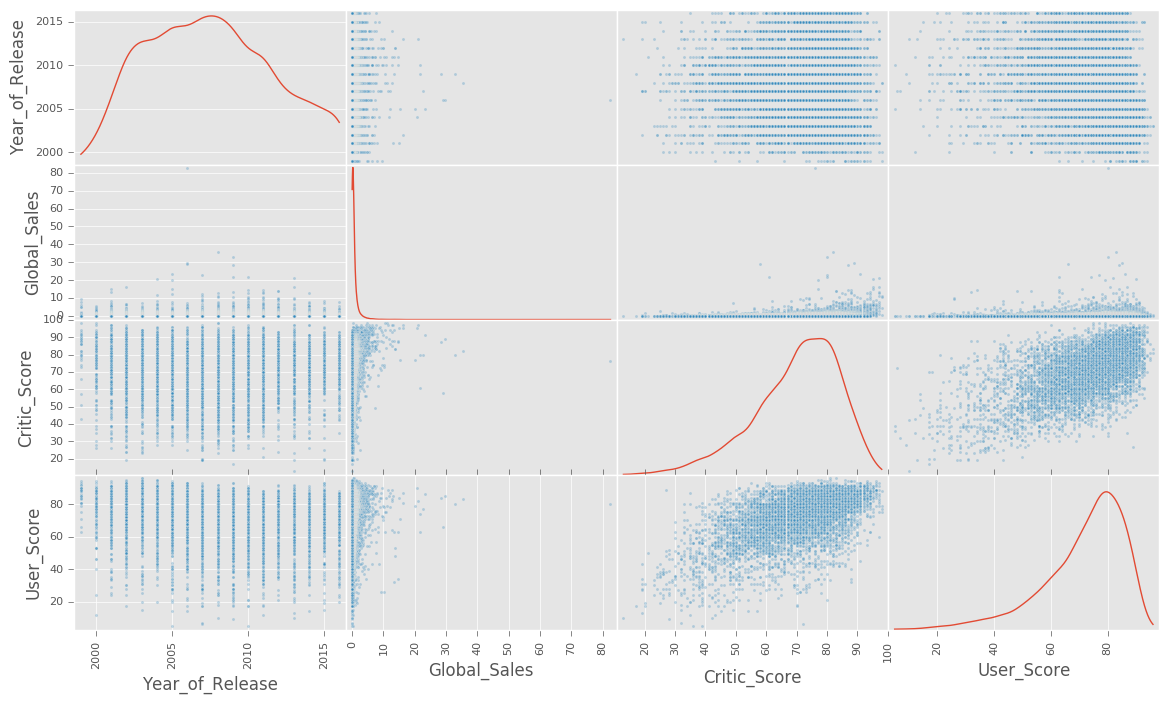

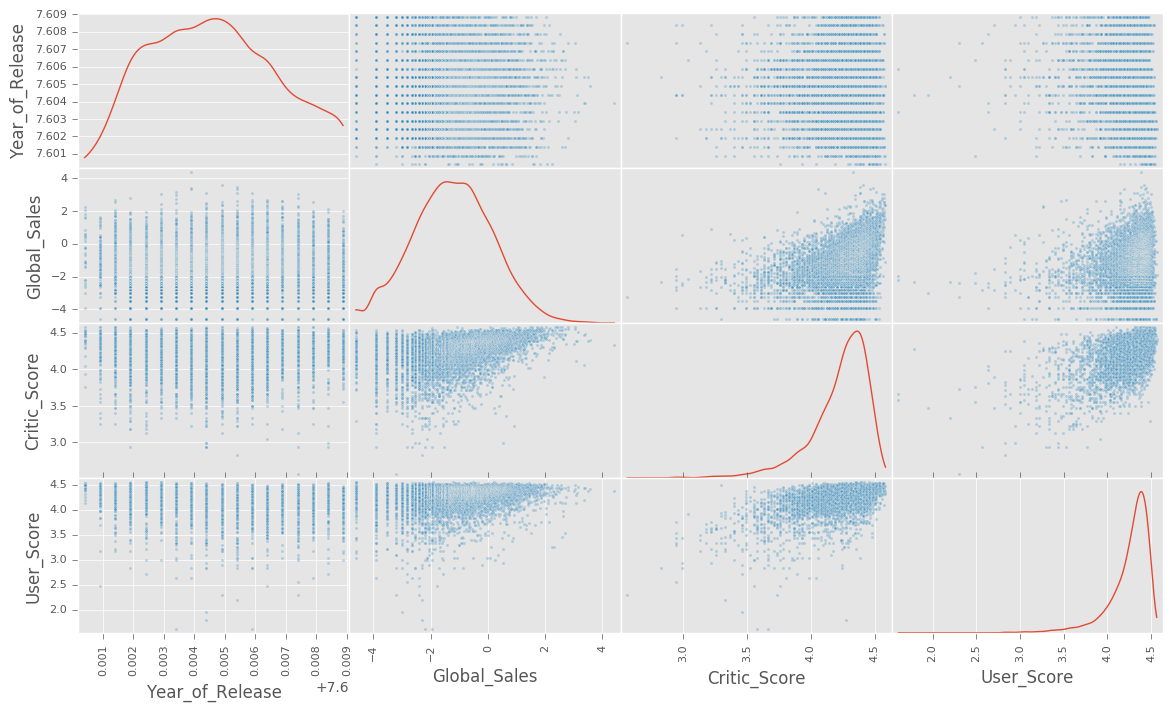

In [139]:
## TESTING: FEATURE SCALING
# If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most often appropriate to apply a non-linear scaling

# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(df2, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

# TODO: Scale the data using the natural logarithm
df2 = df1[['Year_of_Release', 'Global_Sales', 'Critic_Score', 'User_Score']].copy()
log_data = np.log(df2)
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

# GOOD RESULTS! BUT TRY A BOX-COX-TEST!!! http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html

In [147]:
## TESTING: OUTLIER DETECTION

# For each feature find the data points with extreme high or low values
outliers = []
for feature in log_data.keys():

    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = log_data[feature].quantile(0.25)

    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = log_data[feature].quantile(0.75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    outliers.extend(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.values)
    
    # remove outliers
    # log_data = log_data[((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    
# OPTIONAL: Select the indices for data points you wish to remove

df2.ix[outliers]

# Remove the outliers, if any were specified
#good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Year_of_Release':


,Year_of_Release,Global_Sales,Critic_Score,User_Score


Data points considered outliers for the feature 'Global_Sales':


,Year_of_Release,Global_Sales,Critic_Score,User_Score
0,7.603898,4.413162,4.330733,4.382027
2,7.604894,3.570096,4.406719,4.418841
3,7.605392,3.489513,4.382027,4.382027
6,7.603898,3.394508,4.488636,4.442651
7,7.603898,3.364533,4.060443,4.189655
8,7.605392,3.343568,4.465908,4.430817
11,7.603399,3.144583,4.510860,4.454347
13,7.604396,3.122365,4.382027,4.343805
14,7.605890,3.082369,4.110874,4.143135
15,7.605392,3.081451,4.382027,4.304065


Data points considered outliers for the feature 'Critic_Score':


,Year_of_Release,Global_Sales,Critic_Score,User_Score
622,7.604396,0.908259,3.218876,3.761200
669,7.605890,0.862890,3.737670,4.007333
916,7.604894,0.631272,3.367296,3.828641
1050,7.604396,0.530628,2.995732,2.944439
1191,7.604894,0.444686,3.637586,4.043051
1230,7.601902,0.418710,3.637586,3.912023
1294,7.606885,0.385262,3.496508,3.871201
1562,7.604894,0.239017,3.401197,2.995732
1614,7.601402,0.207014,3.465736,3.828641
1908,7.602401,0.076961,3.688879,4.110874


Data points considered outliers for the feature 'User_Score':


,Year_of_Release,Global_Sales,Critic_Score,User_Score
29,7.606387,2.689886,4.477337,3.526361
37,7.606387,2.589267,4.477337,3.465736
60,7.607381,2.327278,4.290459,3.258097
69,7.607381,2.236445,4.262680,3.258097
77,7.608374,2.148268,4.406719,3.761200
126,7.607381,1.867176,4.454347,3.761200
192,7.606885,1.637053,4.477337,3.688879
245,7.608871,1.495149,4.343805,3.526361
271,7.607381,1.439835,4.430817,3.737670
323,7.607381,1.342865,4.356709,3.610918


,Year_of_Release,Global_Sales,Critic_Score,User_Score
0,2006.0,82.53,76.0,80.0
2,2008.0,35.52,82.0,83.0
3,2009.0,32.77,80.0,80.0
6,2006.0,29.80,89.0,85.0
7,2006.0,28.92,58.0,66.0
8,2009.0,28.32,87.0,84.0
11,2005.0,23.21,91.0,86.0
13,2007.0,22.70,80.0,77.0
14,2010.0,21.81,61.0,63.0
15,2009.0,21.79,80.0,74.0


In [ ]:
## TESTING PCA

from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
#pca = PCA(n_components=6)
#pca.fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
#pca_samples = pca.transform(log_samples)

# Generate PCA results plot
#pca_results = vs.pca_results(good_data, pca)

# Display sample log-data after having a PCA transformation applied
#display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

# TODO: Apply PCA by fitting the good data with only two dimensions
#pca = PCA(n_components = 2)
#pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
#reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
#pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
#reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

# Display sample log-data after applying PCA transformation in two dimensions
#display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

Also, Plots will probably help ...

In [141]:
# Are there high correlations?
df1.corr()
# df1.corr()[df1.corr() > 0.7]

# NA_Sales with EU_Sales and yet Other_Sales => Global_Sales
# Critic_Score and User_Score only 0.580318, had not expected that

# TODO: data.drop(...)

# No other correlations, also not for booleans


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,...,Genre_Simulation,Genre_Role-Playing,Genre_Adventure,Genre_Strategy,Rating_E,Rating_M,Rating_T,Rating_E10+,Rating_AO,Rating_RP
Year_of_Release,1.000000,-0.008482,0.051352,-0.012804,0.045303,0.018241,0.008056,0.195750,-0.249898,0.217859,...,-0.036185,0.037325,0.007465,-0.030653,-0.180765,0.161193,-0.081681,0.164118,-0.007410,0.010275
NA_Sales,-0.008482,1.000000,0.842247,0.467282,0.728000,0.956226,0.229684,0.288950,0.081508,0.245819,...,-0.017215,-0.030478,-0.047195,-0.055377,0.055741,0.057805,-0.078674,-0.034403,0.010940,-0.004925
EU_Sales,0.051352,0.842247,1.000000,0.519642,0.717125,0.939642,0.209488,0.271126,0.051697,0.287239,...,-0.001582,-0.035046,-0.037539,-0.040701,0.047225,0.067541,-0.075879,-0.038294,0.006672,-0.003611
JP_Sales,-0.012804,0.467282,0.519642,1.000000,0.396684,0.610596,0.137142,0.183337,0.120086,0.072547,...,0.020040,0.123320,-0.018203,-0.032110,0.066588,-0.038872,-0.011199,-0.027439,-0.002652,-0.002652
Other_Sales,0.045303,0.728000,0.717125,0.396684,1.000000,0.805659,0.190781,0.241394,0.055682,0.242639,...,-0.019142,-0.033604,-0.035913,-0.042800,0.023878,0.070763,-0.064049,-0.027012,0.000339,-0.003257
Global_Sales,0.018241,0.956226,0.939642,0.610596,0.805659,1.000000,0.232777,0.297176,0.083212,0.265893,...,-0.008850,-0.014420,-0.044006,-0.052053,0.056873,0.056397,-0.075834,-0.038066,0.007343,-0.004590
Critic_Score,0.008056,0.229684,0.209488,0.137142,0.190781,0.232777,1.000000,0.404835,0.577882,0.266003,...,-0.004155,0.060341,-0.055911,0.041485,0.020435,0.062927,-0.033382,-0.056158,0.020025,-0.006303
Critic_Count,0.195750,0.288950,0.271126,0.183337,0.241394,0.297176,0.404835,1.000000,0.202319,0.367908,...,-0.064131,0.076479,-0.040573,0.006056,-0.210938,0.276716,0.030663,-0.087953,0.018299,-0.010766
User_Score,-0.249898,0.081508,0.051697,0.120086,0.055682,0.083212,0.577882,0.202319,1.000000,0.018470,...,0.005182,0.099626,-0.001502,0.022656,-0.010712,-0.003920,0.067485,-0.074738,0.012010,-0.003192
User_Count,0.217859,0.245819,0.287239,0.072547,0.242639,0.265893,0.266003,0.367908,0.018470,1.000000,...,-0.034431,0.092322,-0.019187,0.014979,-0.130855,0.285206,-0.072736,-0.061700,-0.001140,-0.003034


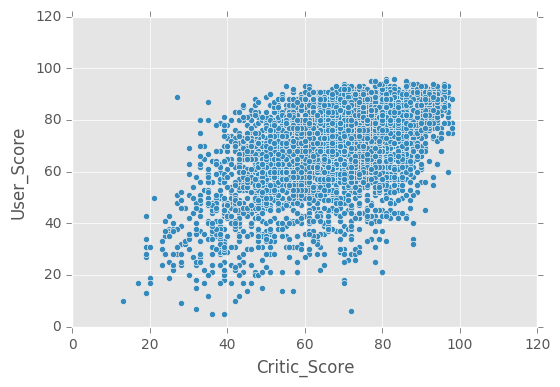

In [142]:
# Critic_Score and User_Score
df1.plot.scatter(x='Critic_Score', y='User_Score')

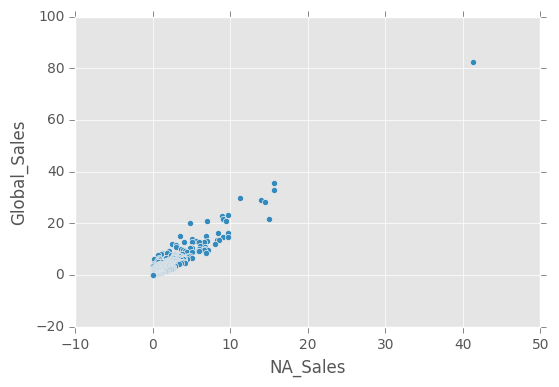

In [143]:
# NA_Sales and Global_Sales
df1.plot.scatter(x='NA_Sales', y='Global_Sales')

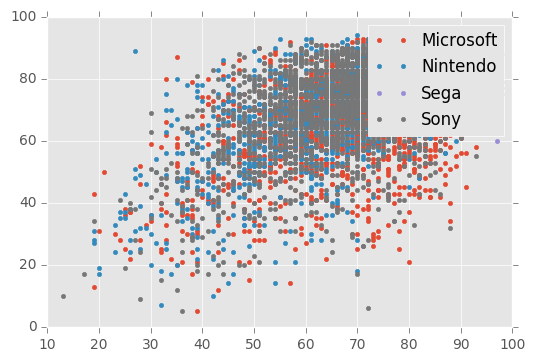

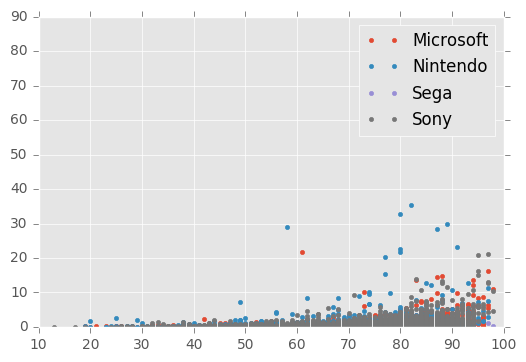

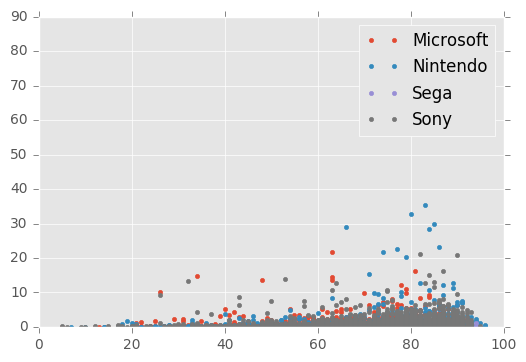

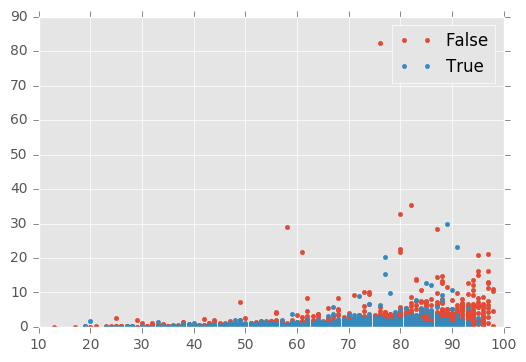

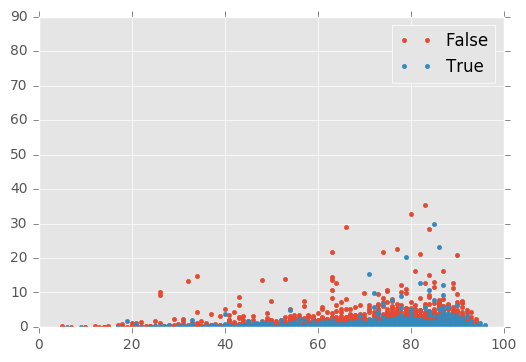

In [144]:
# Just for testing
groups = df1.groupby('Platform_Manufacturer')

# Plot
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.Critic_Score, group.User_Score, marker='.', linestyle='', label=name)
ax.legend()

plt.show()

# Just for testing
groups = df1.groupby('Platform_Manufacturer')

# Plot
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.Critic_Score, group.Global_Sales, marker='.', linestyle='', label=name)
ax.legend()

plt.show()

# Just for testing
groups = df1.groupby('Platform_Manufacturer')

# Plot
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.User_Score, group.Global_Sales, marker='.', linestyle='', label=name)
ax.legend()

plt.show()

# Just for testing
groups = df1.groupby('Portable')

# Plot
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.Critic_Score, group.Global_Sales, marker='.', linestyle='', label=name)
ax.legend()

plt.show()

# Just for testing
groups = df1.groupby('Portable')

# Plot
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.User_Score, group.Global_Sales, marker='.', linestyle='', label=name)
ax.legend()

plt.show()

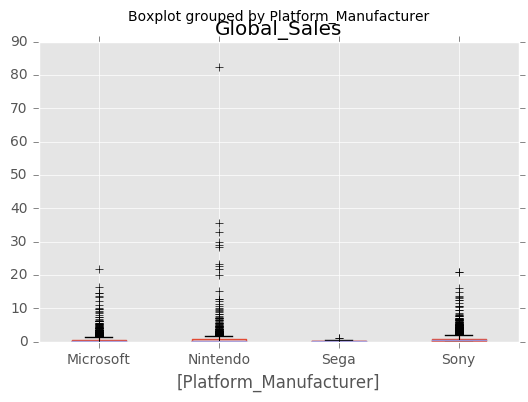

In [145]:
# Global_Sales
df1.boxplot(['Global_Sales'], by=['Platform_Manufacturer'])

In [146]:
# Don't forget ...
# vs.ModelLearning(...) from external file
# vs.ModelComplexity(...) from external file in customer_segments